## 2016313844  Jeonghoon Park

### Data Search, visualization and preprocessing on the titanic dataset
### After learning logisitic regression model, evaluate the model with controlling the cut off values

## 1. Data Search, visualization and preprocessing on Titanic dataset

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *
from pandas import DataFrame, Series

plt.style.use('seaborn')
sns.set(font_scale=2.5) 

df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [19]:
columns = df_train.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [22]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

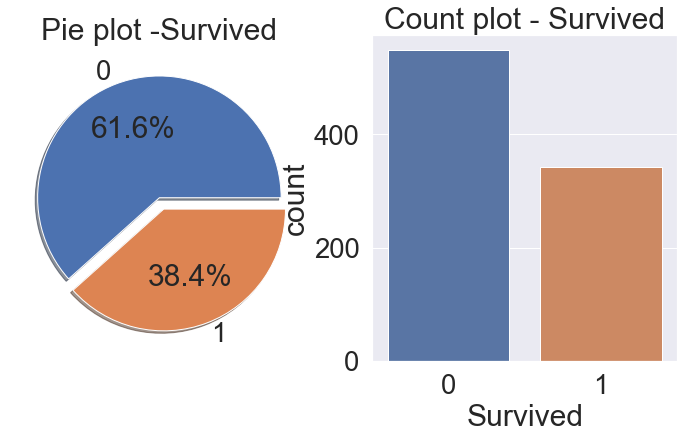

In [24]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
df_train["Survived"].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title("Pie plot -Survived")
ax[0].set_ylabel('')
sns.countplot("Survived", data=df_train, ax=ax[1])
ax[1].set_title("Count plot - Survived")

plt.show()

In [25]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
train = df_train.drop(['Cabin', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1)
test = df_test.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1)

train["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Sex")["Age"].transform("mean"), inplace=True)
test["Fare"].fillna(test.groupby("Sex")["Fare"].transform("median"), inplace=True)

In [28]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [29]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [30]:
sex_mapping = {"male" : 0, "female" : 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

age_mean = train['Age'].mean()
age_std = train['Age'].std()
indexNames = train[train['Age'] < age_mean - 3*age_std].index
train.drop(indexNames, inplace=True)
indexNames = train[train['Age'] > age_mean + 3*age_std].index
train.drop(indexNames, inplace=True)
fare_mean = train['Fare'].mean()
fare_std = train['Fare'].std()
indexNames = train[train['Fare'] < fare_mean - 3*age_std].index
train.drop(indexNames, inplace=True)
indexNames = train[train['Fare'] > fare_mean + 3*age_std].index
train.drop(indexNames, inplace=True)

## 2. Logistic Regression Learning, Measuring Model

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train = train.drop('Survived', axis=1).values
target_label = train['Survived'].values
X_test = test.values
X_train.shape, X_test.shape

((781, 6), (418, 7))

In [34]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2020)
y_tr.shape, y_vld.shape

((624,), (157,))

In [35]:
model = LogisticRegression()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)
prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1], dtype=int64)

In [36]:
print('Number of people: {} \naccuracy: {:.2f}% '.format(y_vld.shape[0], 100 * accuracy_score(y_vld,prediction)))

Number of people: 157 
accuracy: 77.71% 


In [37]:
confusion_matrix(y_vld,prediction)

array([[89, 19],
       [16, 33]], dtype=int64)

In [38]:
print('Precision: {:.2f}% \nRecall: {:.2f}% \nF1-score: {:.2f}% '.format(100*precision_score(y_vld,prediction),
                                                                         100*recall_score(y_vld,prediction),100*f1_score(y_vld,prediction)))

Precision: 63.46% 
Recall: 67.35% 
F1-score: 65.35% 


In [39]:
list = []
for i in np.linspace(0,1,100):
    pred = model.predict_proba(X_vld)[:,1] > i
    cf_mtx = confusion_matrix(y_vld, pred)
    acc = accuracy_score(y_vld, pred)
    tpr = cf_mtx[0,0] / cf_mtx[0].sum()
    fpr = cf_mtx[1,0] / cf_mtx[1].sum()
    f1 = f1_score(y_vld, pred)
    list.append([i, acc, f1, tpr, fpr])

cut_off = DataFrame(list)
cut_off.columns = ["CUTOFF", "ACC", "F1", "TPR", "FPR"]
cut_off

,CUTOFF,ACC,F1,TPR,FPR
0,0.000000,0.312102,0.475728,0.000000,0.000000
1,0.010101,0.312102,0.475728,0.000000,0.000000
2,0.020202,0.318471,0.478049,0.009259,0.000000
3,0.030303,0.318471,0.478049,0.009259,0.000000
4,0.040404,0.324841,0.480392,0.018519,0.000000
...,...,...,...,...,...
95,0.959596,0.719745,0.185185,1.000000,0.897959
96,0.969697,0.700637,0.078431,1.000000,0.959184
97,0.979798,0.694268,0.040000,1.000000,0.979592
98,0.989899,0.687898,0.000000,1.000000,1.000000


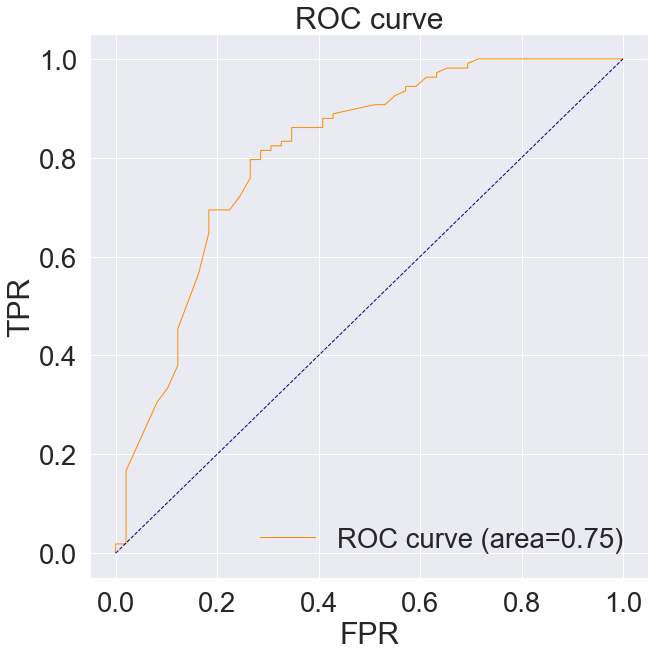

In [40]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_vld, prediction)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(cut_off["FPR"],cut_off["TPR"], color="darkorange", lw=1, label="ROC curve (area=%.2f)" %roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")

In [41]:
cut_off[cut_off["ACC"] == cut_off["ACC"].max()] #accuracy가 최대인 값

,CUTOFF,ACC,F1,TPR,FPR
53,0.535354,0.796178,0.666667,0.861111,0.346939


In [43]:
cut_off_ACC_MAX = cut_off[cut_off["ACC"] == cut_off["ACC"].max()]["CUTOFF"][53]
cut_off_ACC_MAX

0.5353535353535354

In [44]:
pred_ACC_MAX = model.predict_proba(X_vld)[:,1] > cut_off_ACC_MAX

In [45]:
confusion_matrix(y_vld,pred_ACC_MAX)

array([[93, 15],
       [17, 32]], dtype=int64)

In [46]:
cut_off[cut_off["F1"] == cut_off["F1"].max()] #F1-score가 최대인 값

,CUTOFF,ACC,F1,TPR,FPR
43,0.434343,0.783439,0.673077,0.814815,0.285714


In [47]:
cut_off_F1_MAX = cut_off[cut_off["F1"] == cut_off["F1"].max()]["CUTOFF"][43]
cut_off_F1_MAX

0.43434343434343436

In [48]:
pred_F1_MAX = model.predict_proba(X_vld)[:,1] > cut_off_F1_MAX

In [49]:
confusion_matrix(y_vld,pred_F1_MAX)

array([[88, 20],
       [14, 35]], dtype=int64)